In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

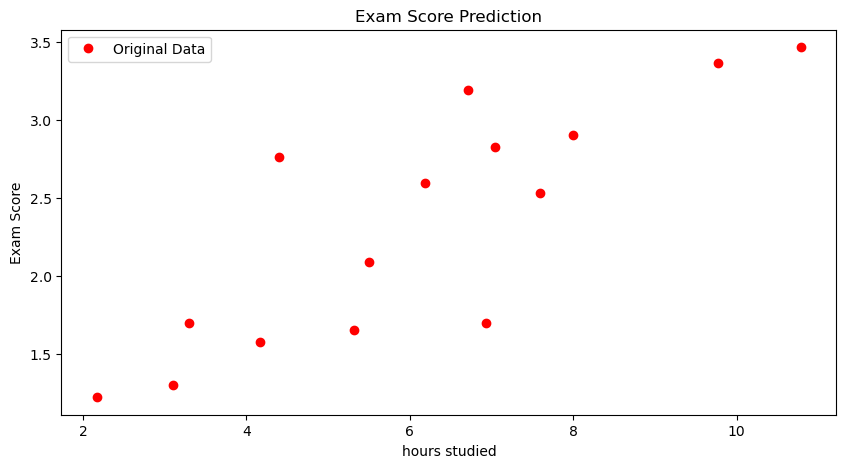

In [10]:
fig=plt.figure(figsize=(10,5))
plt.plot(x_train,y_train,'ro',label='Original Data')
plt.xlabel('hours studied')
plt.ylabel('Exam Score')
plt.legend()
plt.title('Exam Score Prediction')
plt.show()

In [11]:

x_train=torch.from_numpy(x_train)
y_train=torch.from_numpy(y_train)
x_train,y_train


(tensor([[ 3.3000],
         [ 4.4000],
         [ 5.5000],
         [ 6.7100],
         [ 6.9300],
         [ 4.1680],
         [ 9.7790],
         [ 6.1820],
         [ 7.5900],
         [ 2.1670],
         [ 7.0420],
         [10.7910],
         [ 5.3130],
         [ 7.9970],
         [ 3.1000]]),
 tensor([[1.7000],
         [2.7600],
         [2.0900],
         [3.1900],
         [1.6940],
         [1.5730],
         [3.3660],
         [2.5960],
         [2.5300],
         [1.2210],
         [2.8270],
         [3.4650],
         [1.6500],
         [2.9040],
         [1.3000]]))

In [12]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1,1)

    def forward(self, x):
        out = self.linear(x)
        return out

In [13]:
model = LinearRegression()

In [14]:
model

LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [15]:
list(model.parameters())

[Parameter containing:
 tensor([[0.3567]], requires_grad=True),
 Parameter containing:
 tensor([-0.7509], requires_grad=True)]

In [16]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr= 1e-4)

In [17]:
epochs = 1000

In [18]:
for epoch in range(epochs):
    model.train()
    out = model(x_train)
    loss = criterion(out, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 20 == 0:
        print(f'Epoch: [{epoch+1} / {epochs}], Loss: {loss.item():.6f}')


Epoch: [20 / 1000], Loss: 0.884883
Epoch: [40 / 1000], Loss: 0.758948
Epoch: [60 / 1000], Loss: 0.669858
Epoch: [80 / 1000], Loss: 0.606807
Epoch: [100 / 1000], Loss: 0.562161
Epoch: [120 / 1000], Loss: 0.530521
Epoch: [140 / 1000], Loss: 0.508074
Epoch: [160 / 1000], Loss: 0.492124
Epoch: [180 / 1000], Loss: 0.480766
Epoch: [200 / 1000], Loss: 0.472653
Epoch: [220 / 1000], Loss: 0.466833
Epoch: [240 / 1000], Loss: 0.462635
Epoch: [260 / 1000], Loss: 0.459582
Epoch: [280 / 1000], Loss: 0.457339
Epoch: [300 / 1000], Loss: 0.455669
Epoch: [320 / 1000], Loss: 0.454403
Epoch: [340 / 1000], Loss: 0.453424
Epoch: [360 / 1000], Loss: 0.452647
Epoch: [380 / 1000], Loss: 0.452013
Epoch: [400 / 1000], Loss: 0.451480
Epoch: [420 / 1000], Loss: 0.451018
Epoch: [440 / 1000], Loss: 0.450608
Epoch: [460 / 1000], Loss: 0.450233
Epoch: [480 / 1000], Loss: 0.449883
Epoch: [500 / 1000], Loss: 0.449552
Epoch: [520 / 1000], Loss: 0.449234
Epoch: [540 / 1000], Loss: 0.448925
Epoch: [560 / 1000], Loss: 0.448

In [19]:
model.eval()
with torch.no_grad():
    predict = model(x_train)
predict.data.numpy()

array([[0.846235  ],
       [1.3605347 ],
       [1.8748345 ],
       [2.4405642 ],
       [2.5434241 ],
       [1.2520645 ],
       [3.8754606 ],
       [2.1937003 ],
       [2.852004  ],
       [0.31650633],
       [2.5957892 ],
       [4.3486166 ],
       [1.7874036 ],
       [3.042295  ],
       [0.7527259 ]], dtype=float32)

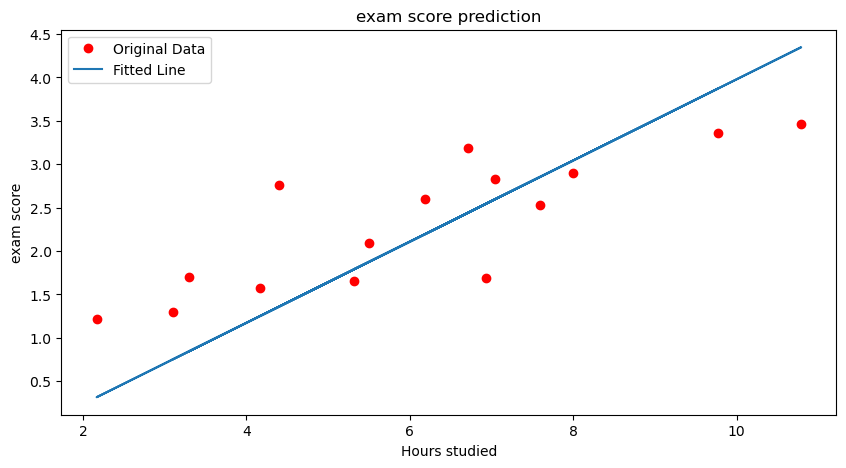

In [20]:
fig=plt.figure(figsize=(10,5))
plt.plot(x_train.numpy(),y_train.numpy(),'ro',label='Original Data')
plt.plot(x_train.numpy(),predict,label='Fitted Line')
plt.xlabel('Hours studied')
plt.ylabel('exam score')
plt.legend()
plt.title('exam score prediction')
plt.show()


In [21]:
list(model.parameters())

[Parameter containing:
 tensor([[0.4675]], requires_grad=True),
 Parameter containing:
 tensor([-0.6967], requires_grad=True)]

In [26]:

new_hours_studied=8.0
new_hours_tensor=torch.tensor([[new_hours_studied]],dtype=torch.float32)
new_hours_tensor

tensor([[8.]])

In [30]:

model.eval()
with torch.no_grad():
 new_exam_score=model(new_hours_tensor)
print('predicted exam score for a student who studied for 8 hours ', new_exam_score.item())

predicted exam score for a student who studied for 8 hours  3.0436975955963135


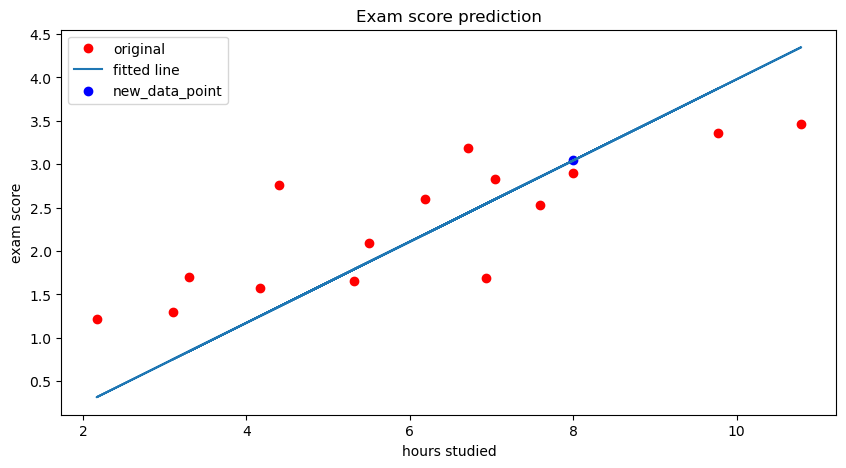

In [31]:

fig=plt.figure(figsize=(10,5))
plt.plot(x_train.numpy(),y_train.numpy(),'ro',label='original')
plt.plot(x_train.numpy(),predict,label='fitted line')
plt.scatter([new_hours_studied],[new_exam_score.item()],color='blue',label='new_data_point')
plt.xlabel('hours studied')
plt.ylabel('exam score')
plt.legend()
plt.title('Exam score prediction')
plt.show()

In [32]:
model.state_dict()


OrderedDict([('linear.weight', tensor([[0.4675]])),
             ('linear.bias', tensor([-0.6967]))])

In [33]:
torch.save(model.state_dict(), './linearregression.pth')